In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# verideki değişkenlerin (features) polinomlarını oluşturarak, lineer modellerin doğrusal olmayan (non-linear) ilişkileri de öğrenebilmesini sağlar.

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Pipeline, veri üzerinde sırayla uygulanacak işlemleri (örneğin: standartlaştırma → polinom dönüşüm → model) tek bir bütün haline getirir.

from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("9-customersatisfaction.csv")

In [5]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


Bu data seti Müşteri memnuniyeti (Customer Satisfaction) , işte temsilcinin müşteri memnuniyetine göre aldığı prim gibi bir şey (Incentive) ve genelde datasetlerine olabilen eğerki yanlışlıkla indexleri silersek diye bulunan Unnamed kolonundan oluşuyor.

Biz burada Unnamed'i kullanmayacağımız için direkt olarak çıkardık.

In [6]:
df.drop("Unnamed: 0", axis =1, inplace=True)

In [7]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


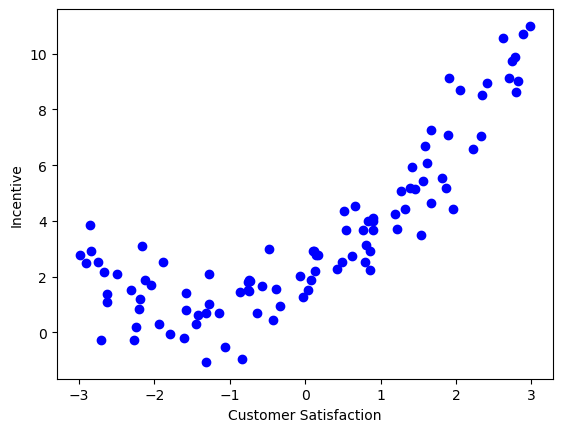

In [11]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

Burada gördüğümüz üzere önce azalan sonra artan polinomal bir ilişki var iki değişken arasında.

Ama diyelim ki bunu anlayamadık ve bildiğimiz Lineer Regresyonu uygulamak istedik.

# Lineer Regresyon

In [18]:
# train - test split

In [12]:
X = df[["Customer Satisfaction"]]
y= df["Incentive"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [19]:
# standartization

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Model fitting

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Evalaute Model

In [28]:
y_pred = regression.predict(X_test)

In [30]:
r2 = r2_score(y_test, y_pred)
print("Lineer Modelin r2 skoru : " , r2)

Lineer Modelin r2 skoru :  0.6638951059107576


Başarısı 0.66'larda olan bir model ortaya çıktı. Hoca da 0.27 çıktı bende neden daha yüksek çıktı çözemedim demek ki hoca beceremedi :) 

Aşağıya grafiğini model fit eğrisini çizdirerek görelim.

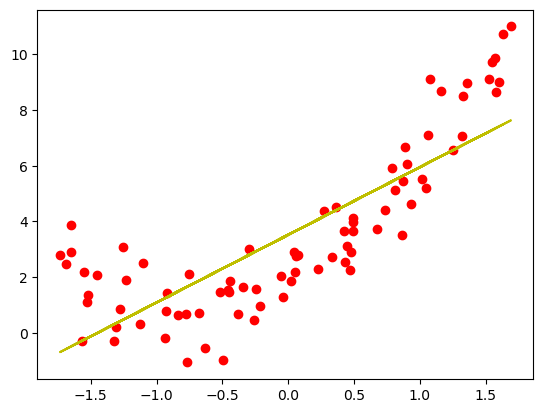

In [31]:
plt.scatter(X_train, y_train, color = "r")
plt.plot(X_train, regression.predict(X_train), color = "y")
plt.show()

Bu regresyonu polinom hale getirmeye ve r2 score'u arttırmaya çalışacağız.

---
# Polinom Regresyon
Şimdi aslında yapacağımız işlem elimizdeki data setini PolynomialFeatures kütüphanesini kullanarak düzenlemek olacak.

In [33]:
poly = PolynomialFeatures(degree = 2, include_bias=True)

In [35]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

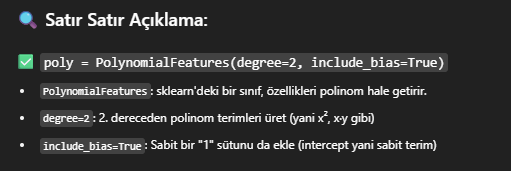

In [36]:
X_train_poly

array([[ 1.00000000e+00, -2.96075482e-01,  8.76606909e-02],
       [ 1.00000000e+00,  7.89404388e-01,  6.23159287e-01],
       [ 1.00000000e+00,  3.61259256e-01,  1.30508250e-01],
       [ 1.00000000e+00,  1.15801896e+00,  1.34100792e+00],
       [ 1.00000000e+00, -1.68859247e+00,  2.85134454e+00],
       [ 1.00000000e+00,  8.11246697e-01,  6.58121203e-01],
       [ 1.00000000e+00,  5.15027314e-02,  2.65253134e-03],
       [ 1.00000000e+00,  9.32604054e-01,  8.69750322e-01],
       [ 1.00000000e+00, -1.73364282e+00,  3.00551744e+00],
       [ 1.00000000e+00, -4.49688051e-01,  2.02219343e-01],
       [ 1.00000000e+00, -1.65264233e+00,  2.73122668e+00],
       [ 1.00000000e+00, -4.55225923e-01,  2.07230641e-01],
       [ 1.00000000e+00,  7.64322768e-02,  5.84189294e-03],
       [ 1.00000000e+00,  1.54756235e+00,  2.39494922e+00],
       [ 1.00000000e+00,  1.69171430e+00,  2.86189728e+00],
       [ 1.00000000e+00, -1.56893987e+00,  2.46157230e+00],
       [ 1.00000000e+00,  1.32502112e+00

X_train_poly, orijinal X_train verisinin genişletilmiş (zenginleştirilmiş) halidir.
Yani içinde artık sadece x değil, x², x·y, 1 gibi ek polinom özellikler de vardır.

Model artık sadece doğrusal değil, kıvrımlı / eğri bir ilişki de öğrenebilir.
Özellikle non-lineer (doğrusal olmayan) veri ilişkileri varsa bu çok işe yarar.



In [37]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_pred, y_test)
print("2 degree Polinom Regresyon r2 skoru : " , r2)

2 degree Polinom Regresyon r2 skoru :  0.8476661026058508


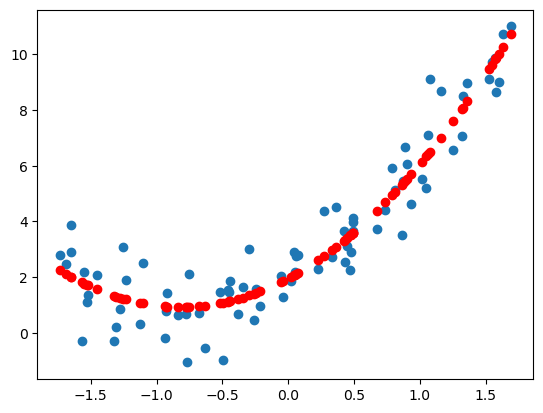

In [40]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

Gördüğümüz üzere daha düzgün bir şekil ve daha doğru olan bir eğrisel fit curve elde ettik.

Şimdi dereceyi 2 değil de 3 yaparak elde edeceğimiz skorları gözlemleyelim.

In [43]:
poly = PolynomialFeatures(degree = 3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [44]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("3 degree Polinom Regresyon r2 skoru : " , r2)

3 degree Polinom Regresyon r2 skoru :  0.8784446149873106


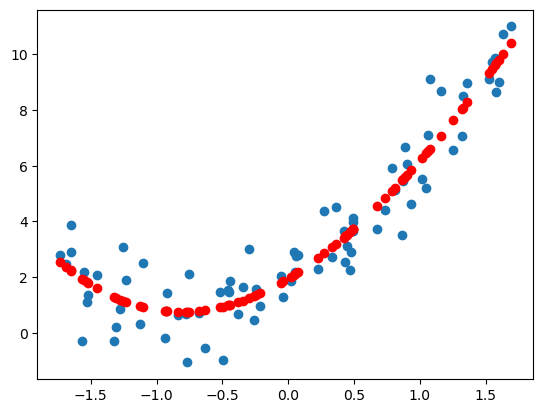

In [46]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

Gördüğümüz üzere r2 skoru daha da artış gösterdi. Dereceyi arttırarak bunu elde ettik. Belki de 4 yaparsam daha da yüksek bir skor elde ederim ?

---
Elimizdeki senaryo : Bu data setini kullanarak bir model eğittik ve başarı yakaladık. Şimdi yeni bir data seti gelecek benzer şekilde içerisinde sadece Customer Satisifaction olacak ve onların alacakları primleri tahmin etmeye çalışacağız.

In [53]:
df_new = pd.read_csv("9-newdatas.csv")

In [54]:
df_new.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [55]:
df_new.rename(columns= {"0" : "Customer Satisfaction"} , inplace=True)   # Kolonun ismini düzelttim.

In [56]:
df_new.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [57]:
X_new = df_new[["Customer Satisfaction"]]
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [58]:
X_new = scaler.fit_transform(X_new)
# Yeni aldığım data setini X_new değişkeni içine attım ve bunu scale ettim. Şimdi de poly'e çevirip  tahmin yapacağım.

X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)

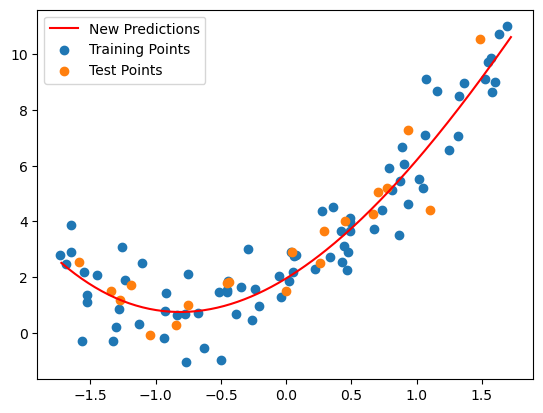

In [61]:
plt.plot(X_new, y_new, "r", label = "New Predictions")
plt.scatter(X_train, y_train, label = "Training Points")
plt.scatter(X_test, y_test, label = "Test Points")
plt.legend()
plt.show()

# PIPELINE

Pipeline, veri üzerinde adım adım uygulanacak işlemleri tek bir yapı içinde sıralı olarak tanımlar.

Yani:

✅ Ön işleme

➕ Özellik dönüşümü

➕ Model eğitimi

🔁 Tahmin

Bunların hepsini birleştirip otomatikleştirir.

In [64]:
def poly_regression(degree):
    scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_features = PolynomialFeatures(degree = degree)

    pipeline = Pipeline(
        [
            ("standart_scaler", scaler),
            ("poly_features", poly_features),
            ("lin_reg", lin_reg)
        ]
    )

    pipeline.fit(X_train, y_train)    # Tüm pipeline adımları sırayla X_train'e uygulanıyor.
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label = "New Predictions")
    plt.scatter(X_train, y_train, label = "Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()


R2 score:  0.6638951059107577


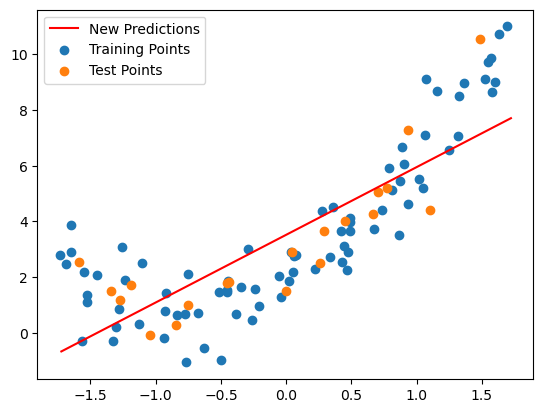

R2 score:  0.8774558449287947


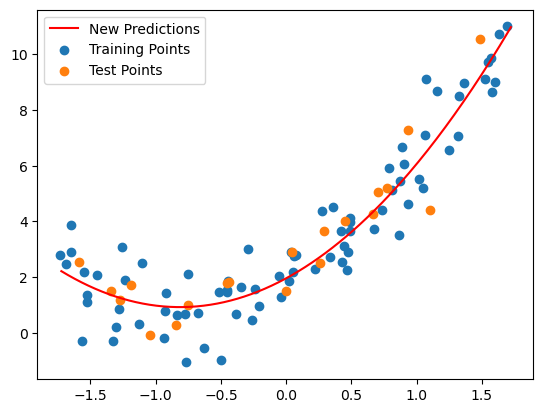

R2 score:  0.8784446149873105


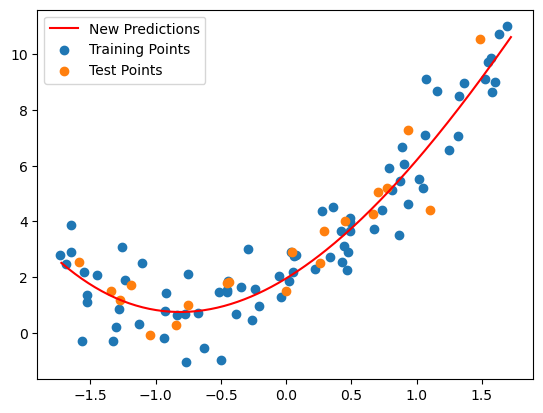

R2 score:  0.8820612203443438


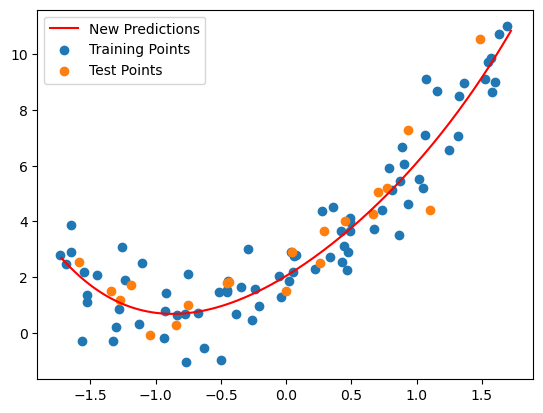

R2 score:  0.8808422084521534


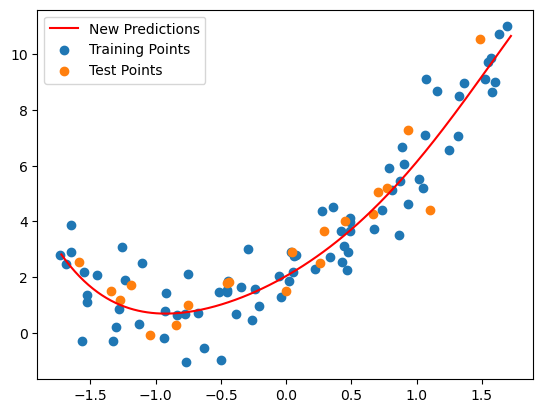

R2 score:  0.8806885482840653


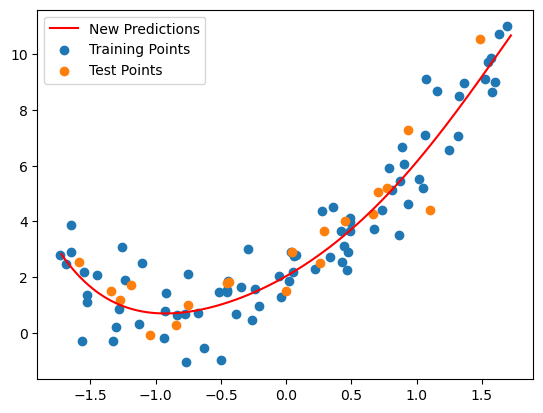

R2 score:  0.8810646178949544


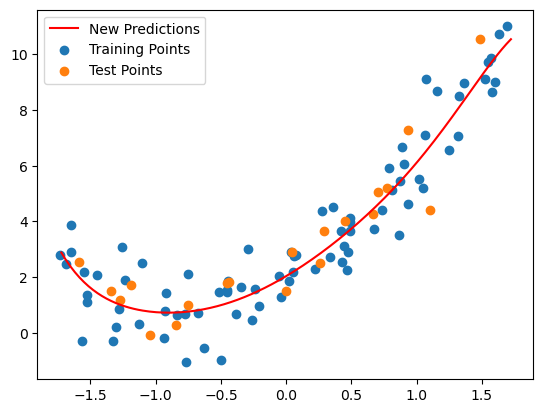

R2 score:  0.8561364653608862


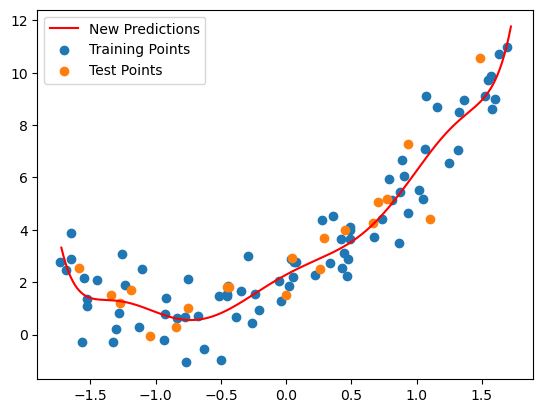

R2 score:  0.8505033739686889


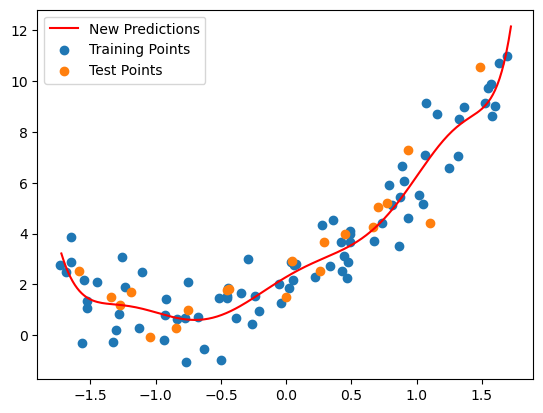

R2 score:  0.8439674671917892


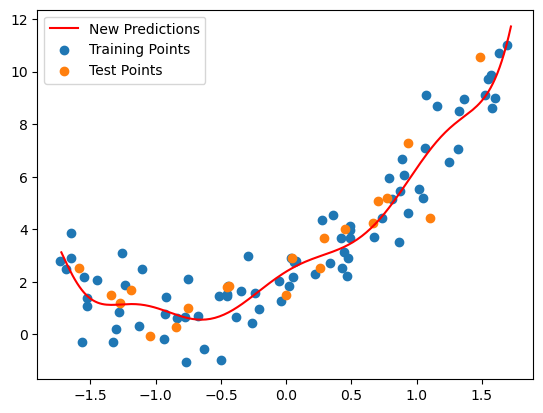

In [65]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)

Sonlara doğru overfitting yaptığını fit line'ın saçma sapan olan halinden anlayabiliyoruz.